### **EDA + REGULARIZED LINEAR REGRESSION - US country level**


### EDA

In [80]:
import pandas as pd

df = pd.read_csv("demographic_health_data.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [82]:
df.columns

Index(['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct',
       '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop',
       '30-39', '30-39 y/o % of total pop',
       ...
       'COPD_number', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code'],
      dtype='object', length=108)

In [83]:
df.drop(["0-9", "19-Oct", "20-29", "30-39"], axis = 1, inplace = True)
df.head()

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,12.206615,13.735364,12.370281,12.749771,7582,13.636445,7738,13.917016,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,11.355276,12.344167,10.814964,11.564429,27338,12.539102,29986,13.753658,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,10.980266,11.896628,13.134520,12.865239,3074,12.354809,3278,13.174712,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,10.964286,11.589286,13.522321,13.897321,3038,13.562500,3115,13.906250,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,12.266598,13.087828,11.656293,11.901798,7474,12.921853,7844,13.561549,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [84]:
df = df.drop_duplicates(subset=df.columns).dropna().reset_index(drop=True)
df.head()

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,12.206615,13.735364,12.370281,12.749771,7582,13.636445,7738,13.917016,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,11.355276,12.344167,10.814964,11.564429,27338,12.539102,29986,13.753658,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,10.980266,11.896628,13.134520,12.865239,3074,12.354809,3278,13.174712,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,10.964286,11.589286,13.522321,13.897321,3038,13.562500,3115,13.906250,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,12.266598,13.087828,11.656293,11.901798,7474,12.921853,7844,13.561549,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


Categorical Variables:

- `fips`: This likely represents the Federal Information Processing Standards (FIPS) code, which is a standardized set of numeric or alphabetic codes issued by the National Institute of Standards and Technology (NIST) to ensure uniform identification of geographic entities such as counties, towns, and cities in the United States.
- `Urban_rural_code`: This likely categorizes areas as urban or rural, providing information about the geographic nature of the region.

Numerical Variables:

- `TOT_POP`: Total population, representing the count of individuals in a specified area.
- `0-9 y/o % of total pop`, `10-19 y/o % of total pop`, `20-29 y/o % of total pop`, `30-39 y/o % of total pop`: These seem to represent the percentage of the total population within specific age ranges.
- `COPD_prevalence`, `diabetes_prevalence`, `CKD_prevalence`: These likely represent the prevalence rates of Chronic Obstructive Pulmonary Disease (COPD), diabetes, and Chronic Kidney Disease (CKD) respectively, indicating the proportion of individuals in the population affected by these conditions.
- `COPD_Lower 95% CI`, `COPD_Upper 95% CI`, `diabetes_Lower 95% CI`, `diabetes_Upper 95% CI`, `CKD_Lower 95% CI`, `CKD_Upper 95% CI`: These variables might represent the lower and upper bounds of the confidence intervals (CI) for the prevalence rates of COPD, diabetes, and CKD.
- `COPD_number`, `diabetes_number`, `CKD_number`: These could represent the actual counts or numbers of individuals diagnosed with COPD, diabetes, and CKD respectively.


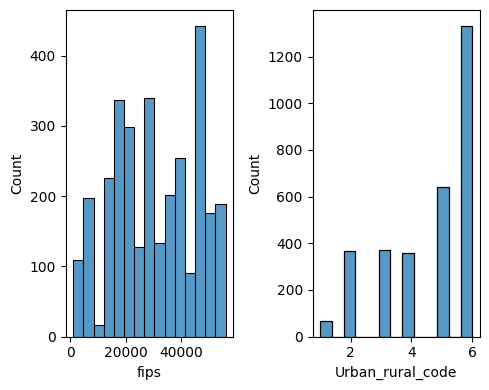

In [85]:
#CATEGORICAL ANALYSIS

import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(5, 4))

sns.histplot(ax=axis[0], data=df, x="fips")
sns.histplot(ax=axis[1], data=df, x="Urban_rural_code")

plt.tight_layout()
plt.show()



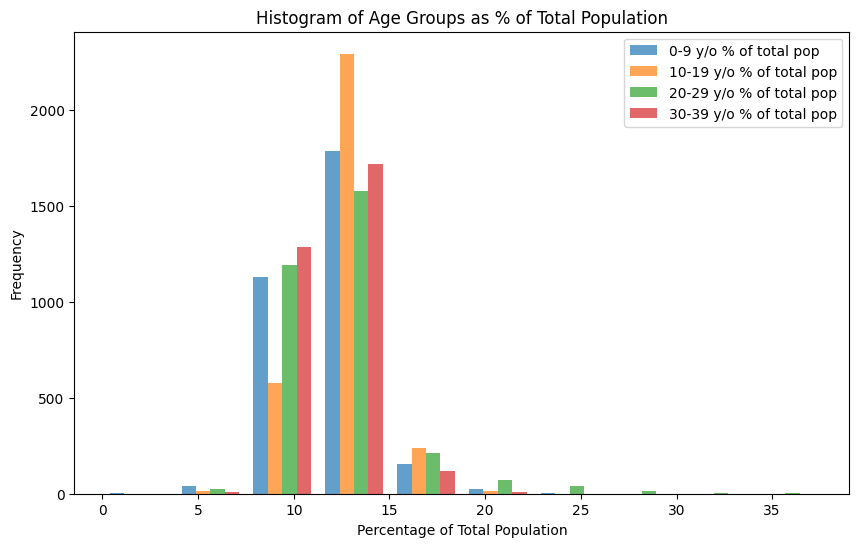

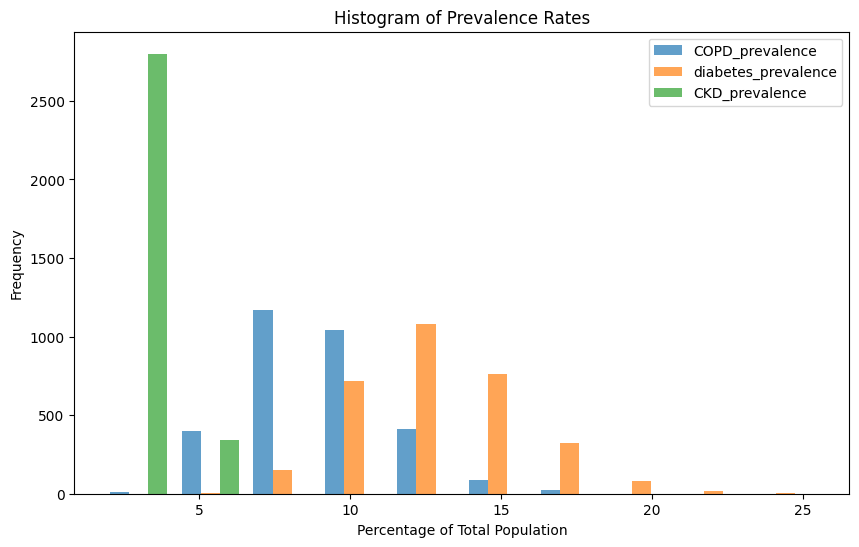

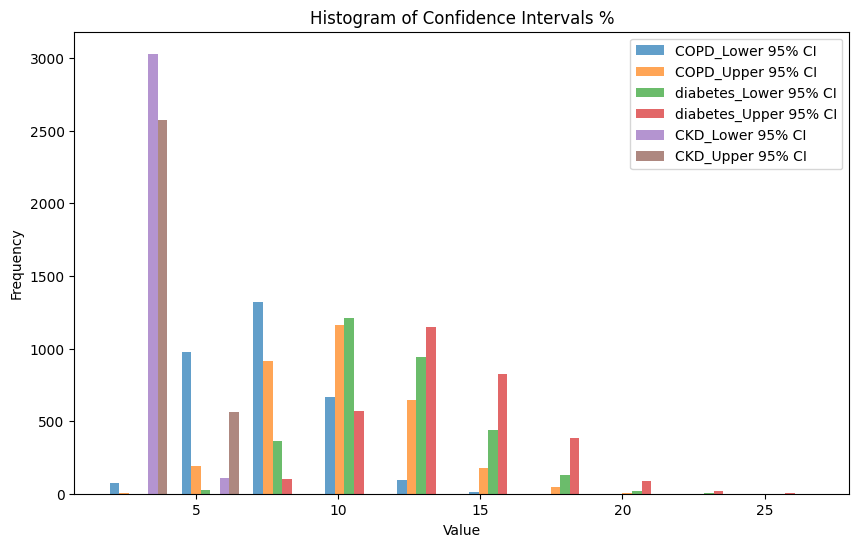

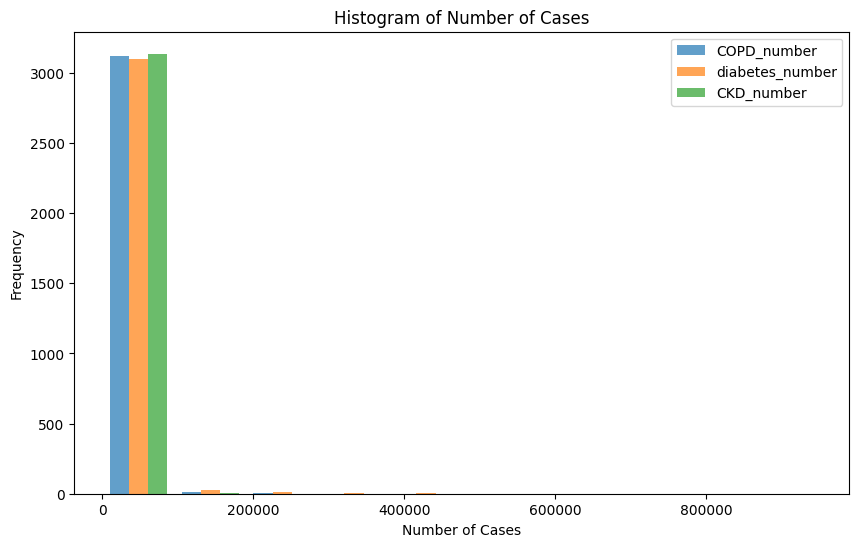

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

data = df[['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop']]

# Plot histogram for each column
plt.figure(figsize=(10, 6))
plt.hist(data.values, bins=10, alpha=0.7, label=data.columns)

plt.title('Histogram of Age Groups as % of Total Population')
plt.xlabel('Percentage of Total Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()


data = df[['COPD_prevalence', 'diabetes_prevalence', 'CKD_prevalence']]

# Plot histogram for each column
plt.figure(figsize=(10, 6))
plt.hist(data.values, bins=10, alpha=0.7, label=data.columns)

plt.title('Histogram of Prevalence Rates')
plt.xlabel('Percentage of Total Population')
plt.ylabel('Frequency')
plt.legend()
plt.show()

data = df[['COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI']]

# Plot histogram for each column
plt.figure(figsize=(10, 6))
plt.hist(data.values, bins=10, alpha=0.7, label=data.columns)

plt.title('Histogram of Confidence Intervals %')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

data = df[['COPD_number', 'diabetes_number', 'CKD_number']]

# Plot histogram for each column
plt.figure(figsize=(10, 6))
plt.hist(data.values, bins=10, alpha=0.7, label=data.columns)

plt.title('Histogram of Number of Cases')
plt.xlabel('Number of Cases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

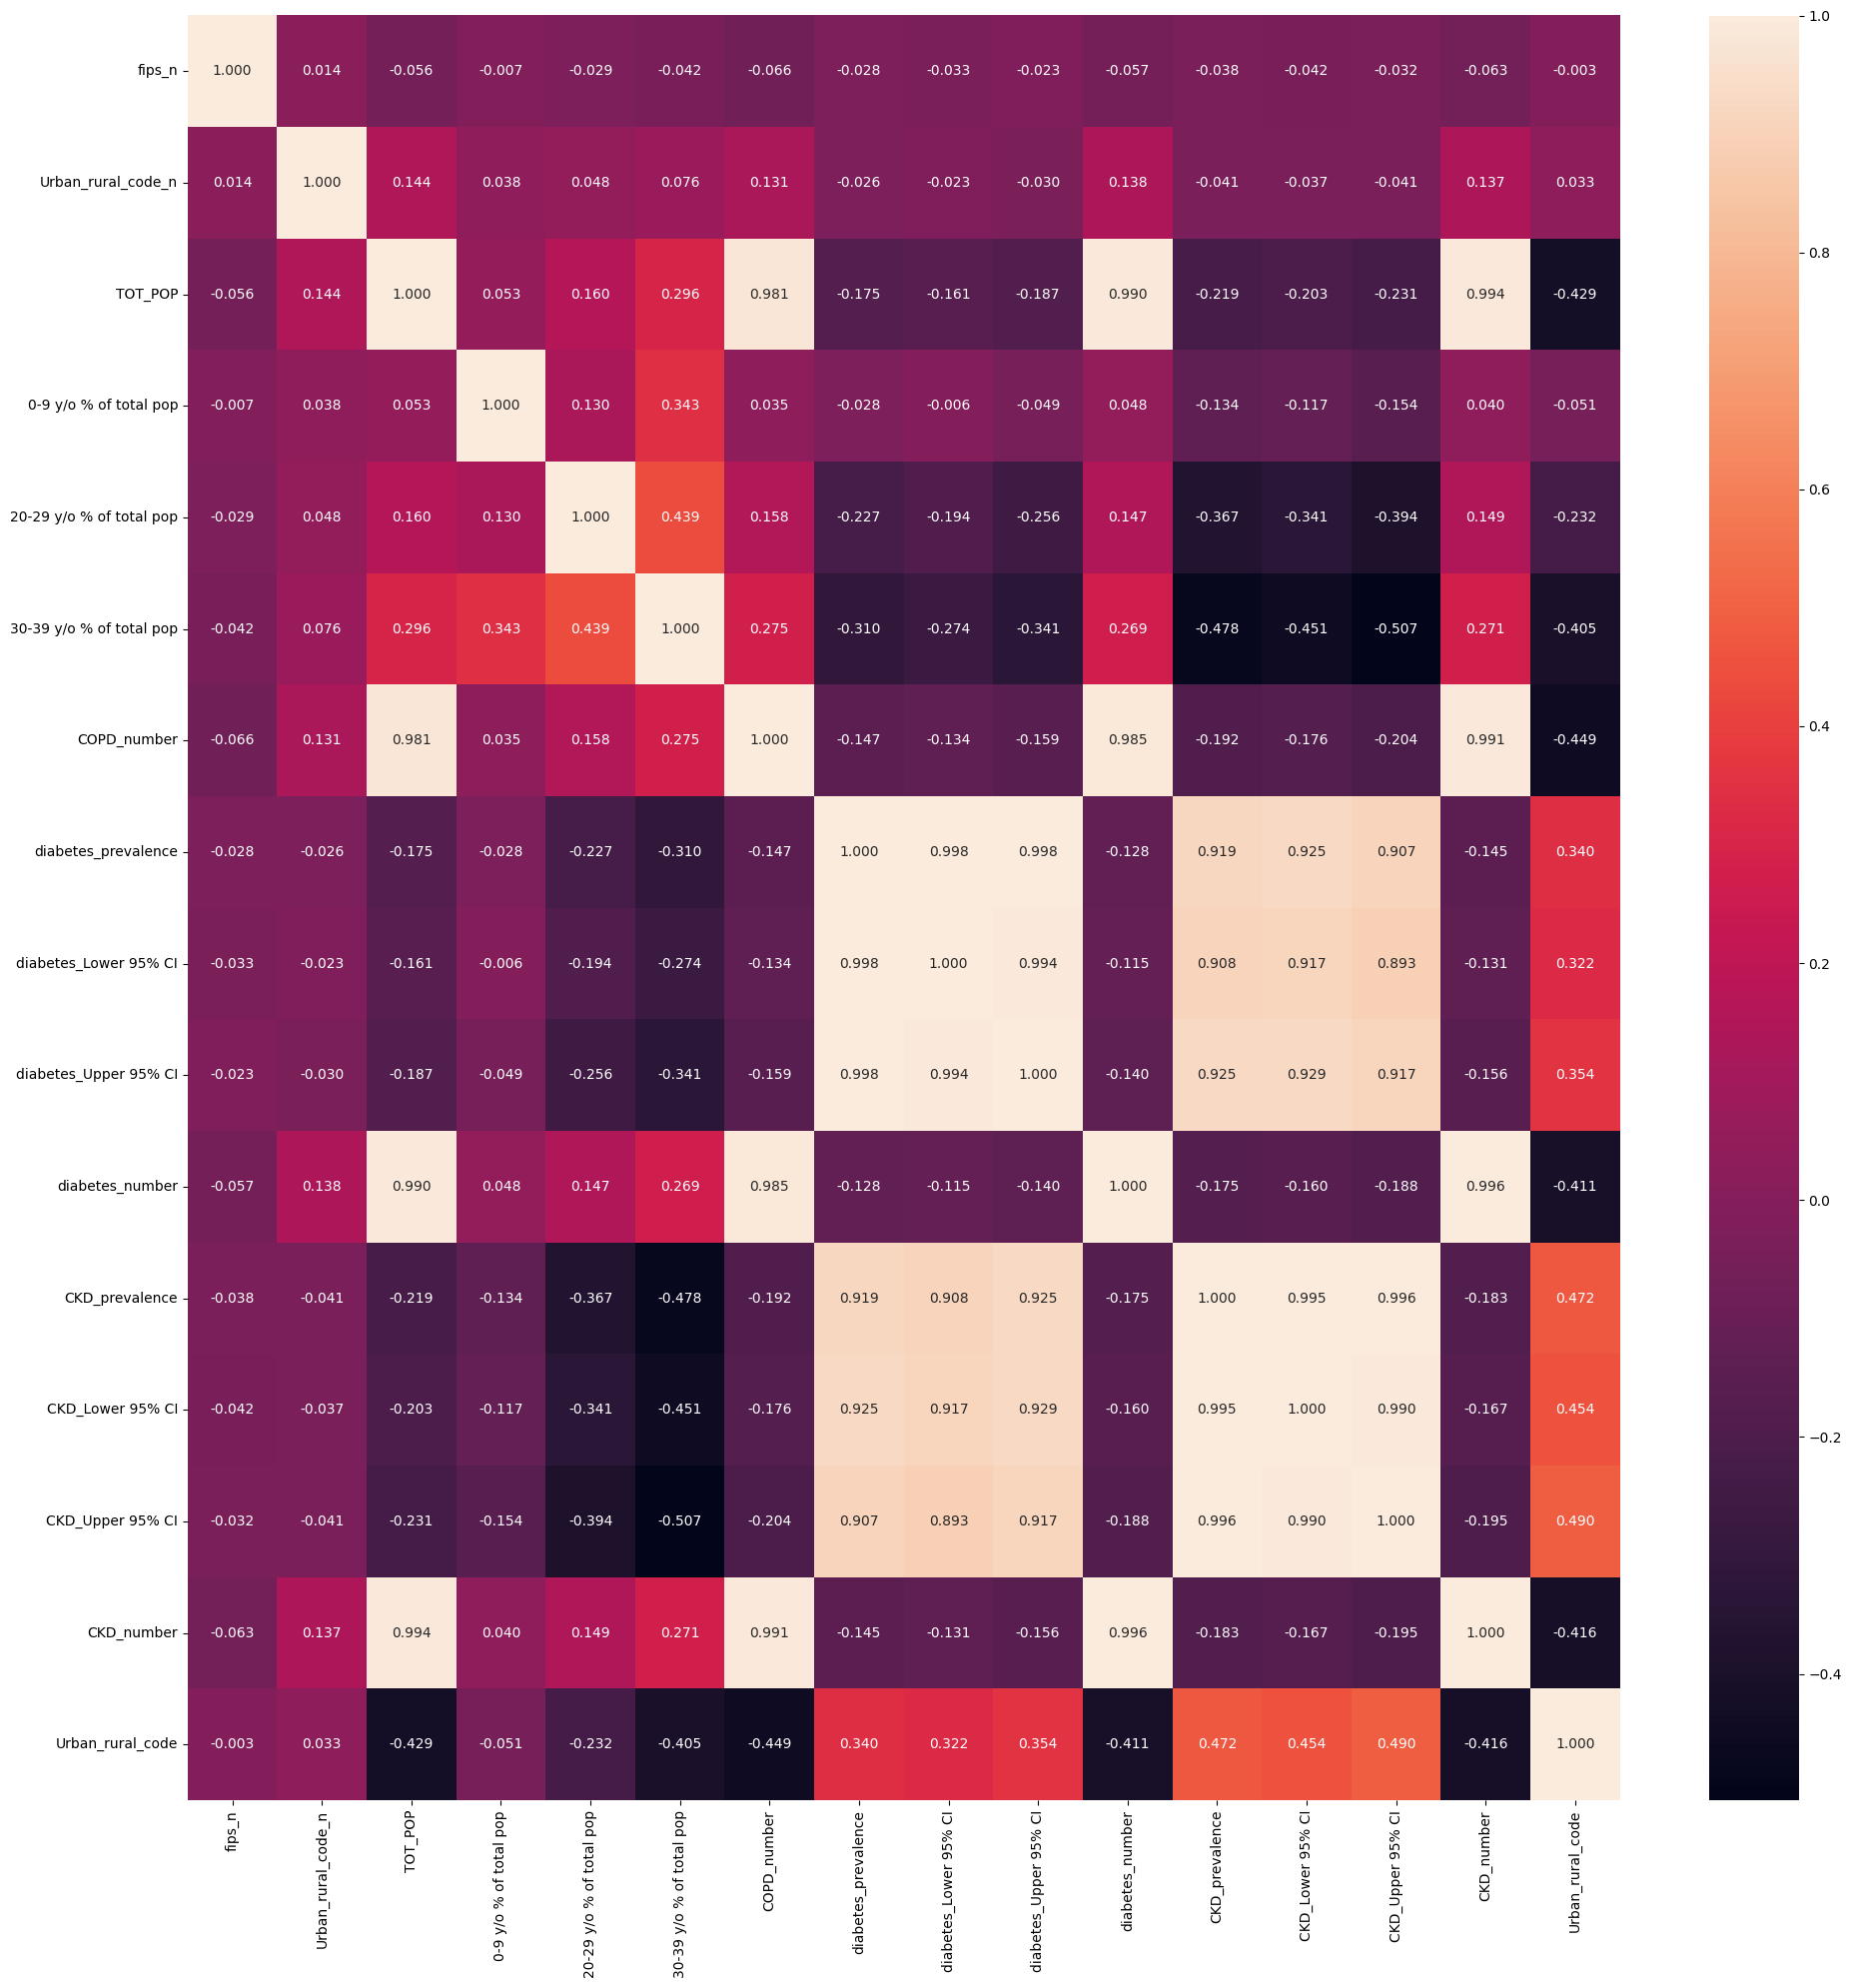

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

df["fips_n"] = pd.factorize(df["fips"])[0]
df["Urban_rural_code_n"] = pd.factorize(df["Urban_rural_code"])[0]

fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(df[["fips_n", "Urban_rural_code_n", "TOT_POP", "0-9 y/o % of total pop", "20-29 y/o % of total pop","30-39 y/o % of total pop","COPD_number",'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence',
       'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number',
       'Urban_rural_code']].corr(), annot = True, fmt = ".3f")

plt.tight_layout()

# Draw Plot
plt.show()

In [88]:
df.describe()

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,fips_n,Urban_rural_code_n
count,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,...,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,11.871051,12.694609,12.283979,11.751535,1.288521e+04,11.556685,1.363803e+04,13.526733,...,12.088089,14.053726,9326.577707,3.446242,3.207516,3.710478,2466.234076,4.635350,1569.500000,2.239490
std,15150.559265,3.335834e+05,2.124081,1.815044,3.126297,1.696599,4.347219e+04,1.372935,4.272063e+04,1.481692,...,2.622948,2.824828,29754.601185,0.568059,0.527740,0.613069,7730.422067,1.510447,906.584249,1.288306
min,1001.000000,8.800000e+01,0.000000,0.000000,0.000000,6.092789,4.000000e+00,2.631579,1.400000e+01,5.316361,...,5.500000,6.700000,11.000000,1.800000,1.700000,1.900000,3.000000,1.000000,0.000000,0.000000
25%,18180.500000,1.096325e+04,10.594639,11.674504,10.496774,10.689322,1.245250e+03,10.685197,1.483000e+03,12.738561,...,10.300000,12.100000,1187.750000,3.100000,2.900000,3.300000,314.750000,3.000000,784.750000,2.000000
50%,29178.000000,2.580050e+04,11.802727,12.687422,11.772649,11.580861,3.048500e+03,11.618372,3.515500e+03,13.621339,...,11.800000,13.800000,2743.000000,3.400000,3.200000,3.700000,718.000000,5.000000,1569.500000,2.000000
75%,45081.500000,6.791300e+04,12.951840,13.659282,13.182260,12.639379,8.120500e+03,12.386083,9.157250e+03,14.429115,...,13.700000,15.900000,6679.250000,3.800000,3.500000,4.100000,1776.250000,6.000000,2354.250000,3.000000
max,56045.000000,1.010552e+07,25.460677,23.304372,37.570198,22.225129,1.350076e+06,19.430369,1.306003e+06,20.454545,...,24.200000,27.000000,952335.000000,6.200000,5.800000,6.600000,237766.000000,6.000000,3139.000000,5.000000


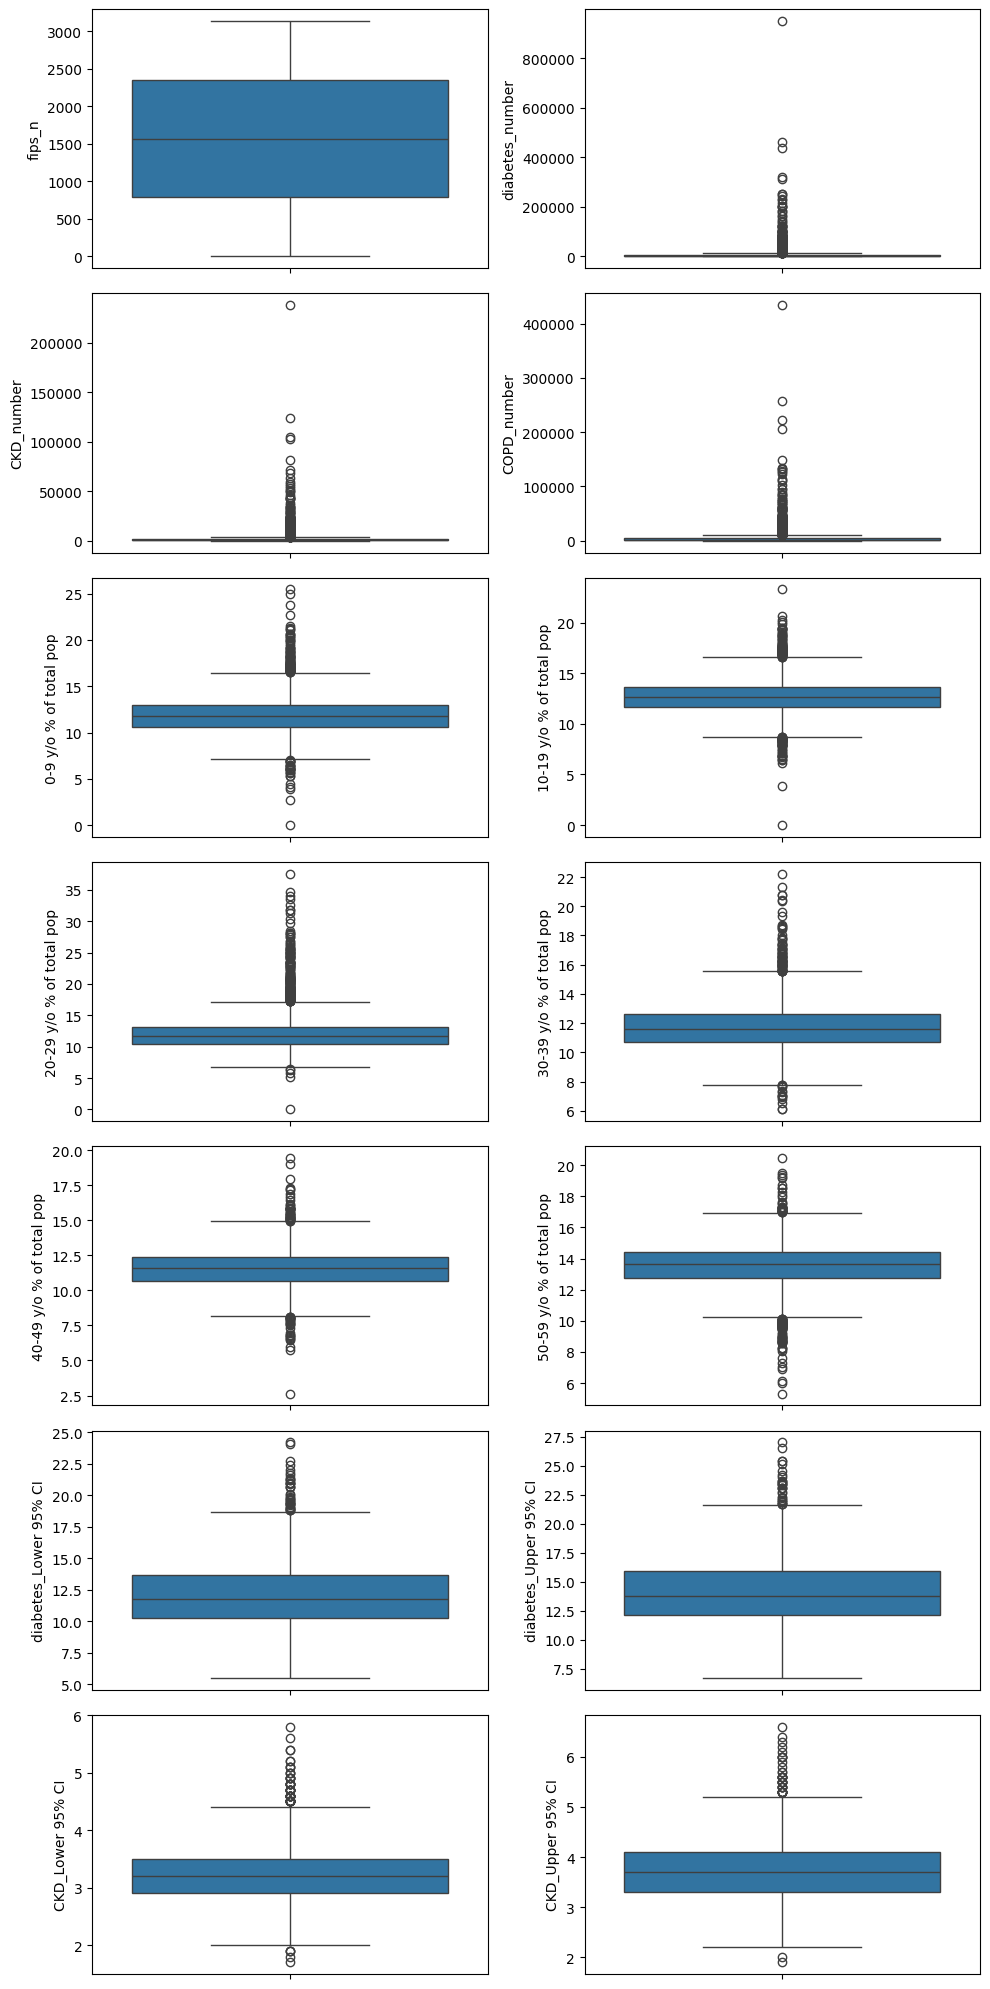

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(7, 2, figsize=(10, 20))

sns.boxplot(ax=axes[0, 0], data=df, y="fips_n")
sns.boxplot(ax=axes[0, 1], data=df, y="diabetes_number")
sns.boxplot(ax=axes[1, 0], data=df, y="CKD_number")
sns.boxplot(ax=axes[1, 1], data=df, y="COPD_number")
sns.boxplot(ax=axes[2, 0], data=df, y="0-9 y/o % of total pop")
sns.boxplot(ax=axes[2, 1], data=df, y="10-19 y/o % of total pop")
sns.boxplot(ax=axes[3, 0], data=df, y="20-29 y/o % of total pop")
sns.boxplot(ax=axes[3, 1], data=df, y="30-39 y/o % of total pop")
sns.boxplot(ax=axes[4, 0], data=df, y="40-49 y/o % of total pop")
sns.boxplot(ax=axes[4, 1], data=df, y="50-59 y/o % of total pop")
sns.boxplot(ax=axes[5, 0], data=df, y="diabetes_Lower 95% CI")
sns.boxplot(ax=axes[5, 1], data=df, y="diabetes_Upper 95% CI")
sns.boxplot(ax=axes[6, 0], data=df, y="CKD_Lower 95% CI")
sns.boxplot(ax=axes[6, 1], data=df, y="CKD_Upper 95% CI")

# Remove the extra subplots
#fig.delaxes(axes[3, 1])

plt.tight_layout()


In [90]:
# Stats for diabetes_number
diabetes_stats = df["diabetes_number"].describe()
diabetes_stats

count      3140.000000
mean       9326.577707
std       29754.601185
min          11.000000
25%        1187.750000
50%        2743.000000
75%        6679.250000
max      952335.000000
Name: diabetes_number, dtype: float64

In [91]:
# IQR for diabetes_number
diabetes_iqr = diabetes_stats["75%"] - diabetes_stats["25%"]
upper_limit = diabetes_stats["75%"] + 1.5 * diabetes_iqr
lower_limit = diabetes_stats["25%"] - 1.5 * diabetes_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(diabetes_iqr, 2)}")

The upper and lower limits for finding outliers are 14916.5 and -7049.5, with an interquartile range of 5491.5


In [92]:
df = df[df["diabetes_number"] > 15.000]

In [93]:
# Stats for CKD_number
CKD_stats = df["CKD_number"].describe()
CKD_stats

count      3138.000000
mean       2467.803378
std        7732.635862
min           7.000000
25%         315.000000
50%         719.500000
75%        1778.750000
max      237766.000000
Name: CKD_number, dtype: float64

In [94]:
# IQR for CKD_number
CKD_iqr = CKD_stats["75%"] - CKD_stats["25%"]
upper_limit = CKD_stats["75%"] + 1.5 * CKD_iqr
lower_limit = CKD_stats["25%"] - 1.5 * CKD_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(CKD_iqr, 2)}")

The upper and lower limits for finding outliers are 3974.38 and -1880.62, with an interquartile range of 1463.75


In [95]:
df = df[df["CKD_number"] > 4000]

In [96]:
# Stats for COPD_number
COPD_stats = df["COPD_number"].describe()
COPD_stats

count       385.000000
mean      30522.649351
std       35862.153136
min        7800.000000
25%       13415.000000
50%       19582.000000
75%       34041.000000
max      434075.000000
Name: COPD_number, dtype: float64

In [97]:
# IQR for C0PD_number
COPD_iqr = COPD_stats["75%"] - COPD_stats["25%"]
upper_limit = COPD_stats["75%"] + 1.5 * COPD_iqr
lower_limit = COPD_stats["25%"] - 1.5 * COPD_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(COPD_iqr, 2)}")

The upper and lower limits for finding outliers are 64980.0 and -17524.0, with an interquartile range of 20626.0


In [98]:
df = df[df["CKD_number"] > 10600]

In [99]:
from sklearn.preprocessing import StandardScaler

data_types = df.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(df[numeric_columns])

# Create a new DataFrame with the scaled numerical variables
total_data_scal = pd.DataFrame(norm_features, index = df.index, columns = numeric_columns)
total_data_scal["Heart disease_number"] = df["Heart disease_number"]
total_data_scal.head()

,fips,TOT_POP,0-9 y/o % of total pop,10-19 y/o % of total pop,20-29 y/o % of total pop,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,...,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,fips_n,Urban_rural_code_n,Heart disease_number
36,-1.646375,-0.399074,0.269192,-0.035411,0.003504,-0.135703,-0.409646,-0.316014,-0.417363,-0.278085,...,1.089129,-0.260632,0.951295,0.974658,0.896286,-0.313844,-1.081137,-1.402353,1.004822,38899
48,-1.644791,-0.631119,0.384535,0.206451,-0.028859,-0.521296,-0.634287,-0.699318,-0.640143,-0.017110,...,1.463780,-0.500135,1.184999,1.229770,1.113399,-0.551453,1.399119,-1.389026,-1.491232,28026
101,-1.452331,3.146218,0.378266,0.630725,0.154713,-0.056237,3.001895,0.173400,2.956398,-0.728105,...,-0.877788,2.338707,0.250183,0.209323,0.244948,3.228167,-1.081137,-1.330169,1.004822,214586
104,-1.451935,-0.040178,-0.574195,-0.016808,0.925247,-1.058793,-0.171698,-1.430082,-0.142409,-1.187974,...,-0.268980,-0.058466,0.951295,0.974658,0.896286,0.133494,1.399119,-1.326837,-1.491232,63461
105,-1.451803,-0.599573,-0.172357,0.116409,-0.917432,-0.237363,-0.596228,-0.407006,-0.672604,-1.638680,...,1.089129,-0.486894,1.418703,1.484882,1.330511,-0.503497,0.158991,-1.325726,0.006400,27761


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,TOT_POP,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,...,Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.517282,-0.456281,-0.499183,-0.570092,-0.604040,-0.638351,-0.399382,-0.517282,-0.284325,-0.603677,...,-0.551471,-0.650364,-0.506044,-0.603796,-0.536065,-0.526643,-0.519766,-0.558764,-0.553728,-0.552579
1,-0.621526,-0.614039,-0.715801,-0.746664,-0.714265,-0.671890,-0.467088,-0.621526,-0.099795,-0.691545,...,-0.789133,-0.646471,-0.610261,-0.721274,-0.661407,-0.566751,-0.560960,-0.663497,-0.422407,-0.501767
2,-0.409413,-0.418903,-0.463332,-0.447598,-0.472547,-0.463342,-0.388181,-0.409413,-0.350817,-0.411461,...,-0.629519,0.424118,-0.403240,-0.457823,-0.431124,-0.363086,-0.392732,-0.363230,-0.372097,-0.409233
3,-0.488425,-0.505004,-0.463741,-0.454671,-0.514345,-0.383429,-0.495702,-0.488425,-0.479725,-0.351714,...,-0.381162,-0.662043,-0.473613,-0.441497,-0.484106,-0.518440,-0.509560,-0.527630,-0.489652,-0.498025
4,-0.428469,-0.424885,-0.297473,-0.295475,-0.320752,-0.253300,-0.276016,-0.428469,-0.480255,-0.275751,...,-0.301571,-0.700973,-0.413391,-0.292226,-0.412039,-0.414533,-0.416461,-0.446038,-0.419382,-0.452241


In [101]:
X_test_sel.head()

,TOT_POP,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,...,Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.238055,-0.181275,-0.192460,-0.230359,-0.268753,-0.221868,-0.349416,-0.238055,-0.262249,-0.161110,...,-0.213768,-0.331134,-0.212210,-0.223839,-0.229829,-0.286731,-0.339163,-0.422729,-0.222812,-0.327362
1,-0.027426,0.036844,0.042791,0.016747,-0.010851,0.080281,-0.171090,-0.027426,-0.228860,-0.490828,...,0.346083,-0.467390,-0.019516,0.015364,-0.036406,-0.200296,-0.208575,-0.335368,-0.103642,-0.143864
2,-0.195459,-0.186902,-0.083715,-0.077437,-0.085621,-0.070260,-0.074344,-0.195459,-0.225571,0.064260,...,-0.023178,-0.576396,-0.186699,-0.072583,-0.179553,-0.049971,-0.052179,0.089269,-0.135896,-0.161928
3,-0.355519,-0.334102,-0.269407,-0.311179,-0.323220,-0.192571,-0.281723,-0.355519,-0.462090,-0.488920,...,0.181505,-0.821658,-0.348587,-0.274417,-0.341771,-0.456337,-0.486645,-0.539358,-0.497625,-0.445482
4,0.011636,0.112274,-0.034305,-0.165919,-0.270339,-0.344420,-0.178468,0.011636,-0.176199,-0.313591,...,-0.142462,-0.377850,-0.024200,-0.267257,-0.002312,-0.106170,0.008358,-0.135428,-0.151236,-0.117512


In [103]:
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("data/clean_train.csv", index = False)
X_test_sel.to_csv("data/clean_test.csv", index = False)

In [104]:
total_data = pd.concat([X_train_sel, X_test_sel])
total_data.head()

,TOT_POP,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,...,ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.517282,-0.456281,-0.499183,-0.570092,-0.604040,-0.638351,-0.399382,-0.517282,-0.284325,-0.603677,...,-0.650364,-0.506044,-0.603796,-0.536065,-0.526643,-0.519766,-0.558764,-0.553728,-0.552579,23918
1,-0.621526,-0.614039,-0.715801,-0.746664,-0.714265,-0.671890,-0.467088,-0.621526,-0.099795,-0.691545,...,-0.646471,-0.610261,-0.721274,-0.661407,-0.566751,-0.560960,-0.663497,-0.422407,-0.501767,25838
2,-0.409413,-0.418903,-0.463332,-0.447598,-0.472547,-0.463342,-0.388181,-0.409413,-0.350817,-0.411461,...,0.424118,-0.403240,-0.457823,-0.431124,-0.363086,-0.392732,-0.363230,-0.372097,-0.409233,36429
3,-0.488425,-0.505004,-0.463741,-0.454671,-0.514345,-0.383429,-0.495702,-0.488425,-0.479725,-0.351714,...,-0.662043,-0.473613,-0.441497,-0.484106,-0.518440,-0.509560,-0.527630,-0.489652,-0.498025,27257
4,-0.428469,-0.424885,-0.297473,-0.295475,-0.320752,-0.253300,-0.276016,-0.428469,-0.480255,-0.275751,...,-0.700973,-0.413391,-0.292226,-0.412039,-0.414533,-0.416461,-0.446038,-0.419382,-0.452241,31557


In [105]:
X_test_sel.head()

,TOT_POP,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,...,ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.238055,-0.181275,-0.192460,-0.230359,-0.268753,-0.221868,-0.349416,-0.238055,-0.262249,-0.161110,...,-0.331134,-0.212210,-0.223839,-0.229829,-0.286731,-0.339163,-0.422729,-0.222812,-0.327362,36449
1,-0.027426,0.036844,0.042791,0.016747,-0.010851,0.080281,-0.171090,-0.027426,-0.228860,-0.490828,...,-0.467390,-0.019516,0.015364,-0.036406,-0.200296,-0.208575,-0.335368,-0.103642,-0.143864,41569
2,-0.195459,-0.186902,-0.083715,-0.077437,-0.085621,-0.070260,-0.074344,-0.195459,-0.225571,0.064260,...,-0.576396,-0.186699,-0.072583,-0.179553,-0.049971,-0.052179,0.089269,-0.135896,-0.161928,52383
3,-0.355519,-0.334102,-0.269407,-0.311179,-0.323220,-0.192571,-0.281723,-0.355519,-0.462090,-0.488920,...,-0.821658,-0.348587,-0.274417,-0.341771,-0.456337,-0.486645,-0.539358,-0.497625,-0.445482,30840
4,0.011636,0.112274,-0.034305,-0.165919,-0.270339,-0.344420,-0.178468,0.011636,-0.176199,-0.313591,...,-0.377850,-0.024200,-0.267257,-0.002312,-0.106170,0.008358,-0.135428,-0.151236,-0.117512,44960


### REGULARIZED LINEAR REGRESSION

In [107]:
train_data = pd.read_csv("data/clean_train.csv")
test_data = pd.read_csv("data/clean_test.csv")

train_data.head()

,TOT_POP,40-49,50-59,60-69,70-79,80+,White-alone pop,POP_ESTIMATE_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,...,ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.517282,-0.456281,-0.499183,-0.570092,-0.604040,-0.638351,-0.399382,-0.517282,-0.284325,-0.603677,...,-0.650364,-0.506044,-0.603796,-0.536065,-0.526643,-0.519766,-0.558764,-0.553728,-0.552579,23918
1,-0.621526,-0.614039,-0.715801,-0.746664,-0.714265,-0.671890,-0.467088,-0.621526,-0.099795,-0.691545,...,-0.646471,-0.610261,-0.721274,-0.661407,-0.566751,-0.560960,-0.663497,-0.422407,-0.501767,25838
2,-0.409413,-0.418903,-0.463332,-0.447598,-0.472547,-0.463342,-0.388181,-0.409413,-0.350817,-0.411461,...,0.424118,-0.403240,-0.457823,-0.431124,-0.363086,-0.392732,-0.363230,-0.372097,-0.409233,36429
3,-0.488425,-0.505004,-0.463741,-0.454671,-0.514345,-0.383429,-0.495702,-0.488425,-0.479725,-0.351714,...,-0.662043,-0.473613,-0.441497,-0.484106,-0.518440,-0.509560,-0.527630,-0.489652,-0.498025,27257
4,-0.428469,-0.424885,-0.297473,-0.295475,-0.320752,-0.253300,-0.276016,-0.428469,-0.480255,-0.275751,...,-0.700973,-0.413391,-0.292226,-0.412039,-0.414533,-0.416461,-0.446038,-0.419382,-0.452241,31557


In [108]:
X_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
X_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

In [109]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): [-1.07590114 -0.23628501 -1.11049796 -1.42248268 -0.35729388 -0.00839484
 -0.21367561 -0.47641192 -0.27723447 -0.48614029 -0.89999678 -1.32210026
 -0.49760015 -0.45917727 -0.53446439 -0.31887219 -0.16242308 -0.82914099
 -0.62622501 -0.67946231 -0.84330197 -0.43826884 -0.36506934  0.14200761
 -0.04617368 -0.2455606  -0.97395061 -1.16053057 -0.43848721 -0.31410207
 -0.4946744  -1.27551652  0.22576241  0.17198436  0.19055647  0.19049991
  0.32932081 -0.08703147  0.41392902  0.29232982  0.10775045  0.30486968
  0.2516454  -0.97796079  0.44546166 -1.12231381 -1.01048608  0.4324498
  0.18306325 -0.05622137  0.60527677  0.4156461  -0.08057626  0.4259104
  0.14429067  0.67876233  0.72447786  0.96062922  0.86998688  0.76250531
  0.74687936  0.19774799 -0.42927939  0.67060789  1.21546776  0.7322765
  0.69283251  0.64678001  0.77890524  0.81977921  0.12862638  0.90156746
  0.85745795  0.86986885  0.28839825  0.59778499  0.84366836  0.90839815
  0.59124607  0.90670573  0.8101975   0.

In [111]:
y_pred = model.predict(X_test)
y_pred

array([ 40301,  40301,  40301,  40301,  43410,  40301,  40301,  40301,
        23641,  50058,  23641, 110912,  43440,  23641,  23641,  23641,
        23641,  23641,  33840,  33256,  40301,  62250,  79547, 242072,
        40556, 112422,  40301,  43440,  33256,  23641, 104031, 123684],
      dtype=int64)

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 1258437749.875
R2 Score: 0.7589068090538336


In [113]:
#Model Optimization

from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# Training the model
lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [  1160.94512241   9914.27903367   5646.12571192    705.55817638
   1658.70277928   2014.50807916   6290.01634797 -22359.87905126
   2715.53337632   2191.48287265   -287.31333645   2883.22536006
   8312.69009344   9464.61394653     56.86545867  -3454.62890753
  -1369.8425298    -188.318416    -7292.52010178  -3293.55721922
   5719.15363057  -1267.22184779 -20629.61597555  18497.36144559
  -2277.11599602  -3405.62405911   8281.43871885  17579.27789739
   7086.4578434    5503.87900556]
R2 score: 0.9923164783800232


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+08, tolerance: 1.845e+07
  model = cd_fast.enet_coordinate_descent(


In [116]:
from pickle import dump
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  
lasso_model.fit(X_train, y_train) 

dump(lasso_model, open("data/lasso_alpha-1.0.sav", "wb"))


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.319e+08, tolerance: 1.845e+07
  model = cd_fast.enet_coordinate_descent(
